# Feature engineering, advanced models and results interpretation.

**Purpose and scope:**

The primary objective is to support appraisers in the complex process of valuing properties. Machine learning models have been developed to predict property sale prices based on certain characteristics.

The goal is to improve performance and gain a deeper understanding of the problem. To this end, data transformations were applied and several advanced models were trained.

What can you learn about the problem you're addressing by studying your own model? Let's find out!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gc #garbage collector
import os #esta libreria permite trabajar con funciones del sistema operativo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Comienzo cargando el dataset completo (DSProyecto01DatosProperati.csv)
propiedades = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dataframe= pd.DataFrame(propiedades)

In [ ]:
propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
#Estudio las variables que posee para tener una aproximacion de que es cada atributo
propiedades.dtypes

start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [ ]:
#Observo la forma y dimension original de dataset para ir observando como se modifica con los distintos pasos de filtrado
print(propiedades.shape)

(146660, 19)


In [ ]:
for indice, elemento in enumerate(propiedades.columns):
    print(indice, elemento)

0 start_date
1 end_date
2 created_on
3 lat
4 lon
5 l1
6 l2
7 l3
8 rooms
9 bedrooms
10 bathrooms
11 surface_total
12 surface_covered
13 price
14 currency
15 title
16 description
17 property_type
18 operation_type


In [ ]:
#me quedo con el tipo de pripiedad como variable categorica
tipo_propiedad = list(propiedades['property_type'].unique())
print(tipo_propiedad)

#contabilizo la cantidad de estas propiedad
numero_propiedad = list(propiedades['property_type'].value_counts())
print(numero_propiedad)

['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']
[107326, 21521, 14298, 1312, 658, 374, 325, 322, 265, 259]


Text(0.5, 0, 'Tipo de propiedad')

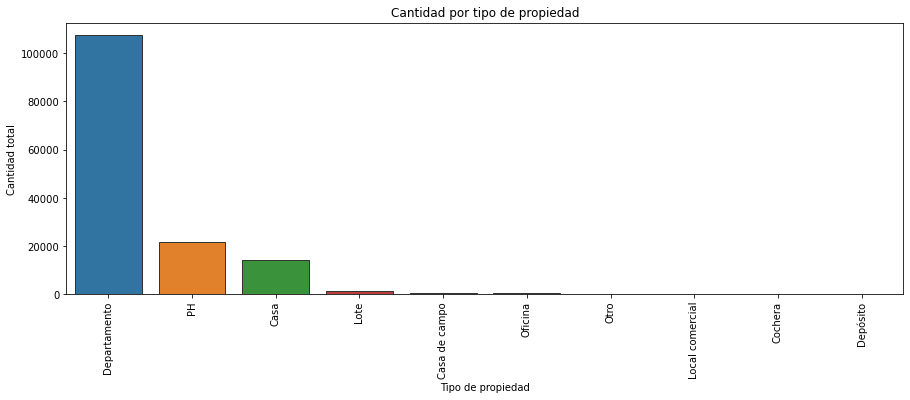

In [ ]:
#grafico dicha informacion creando un Barplot
plt.figure(figsize=(15,5))
grafico = sns.barplot(x = tipo_propiedad, y = numero_propiedad, edgecolor=".2")
plt.xticks(rotation=90)  #esto lo vimos con nahuel para mejorar la posicion de las etiquetas en el eje x
plt.title('Cantidad por tipo de propiedad')
plt.ylabel('Cantidad total')
plt.xlabel('Tipo de propiedad')

In [ ]:
#Para enfocar en los barrios de las publicaciones, guardo en distintas Variables la informacion que me sirve para revelar lo solicitado (variable l3)

#variable l3
varible_l3 = list(propiedades['l3'].unique())
cantidad_l3 = list(propiedades['l3'].value_counts())
print(varible_l3)
print(cantidad_l3)

['San Cristobal', 'Boedo', 'Palermo', 'La Plata', 'Villa Crespo', 'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto', 'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta', 'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo', 'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel', 'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás', 'Villa Urquiza', 'Vicente López', 'Parque Centenario', 'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó', 'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda', 'San Fernando', 'Puerto Madero', 'Villa Ortuzar', 'Parque Chacabuco', 'Centro / Microcentro', 'Tres de Febrero', 'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra', 'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución', 'Mataderos', 'Villa Devoto', 'Parque Avellaneda', 'Villa del Parque', 'Esteban Echeverría', 'Lomas de Zamora', 'Almirante Brown', 'Ezeiza', 'San Vicente', 'Berazategui', 'Quilmes', 'Malvinas Argentinas', 'José C P

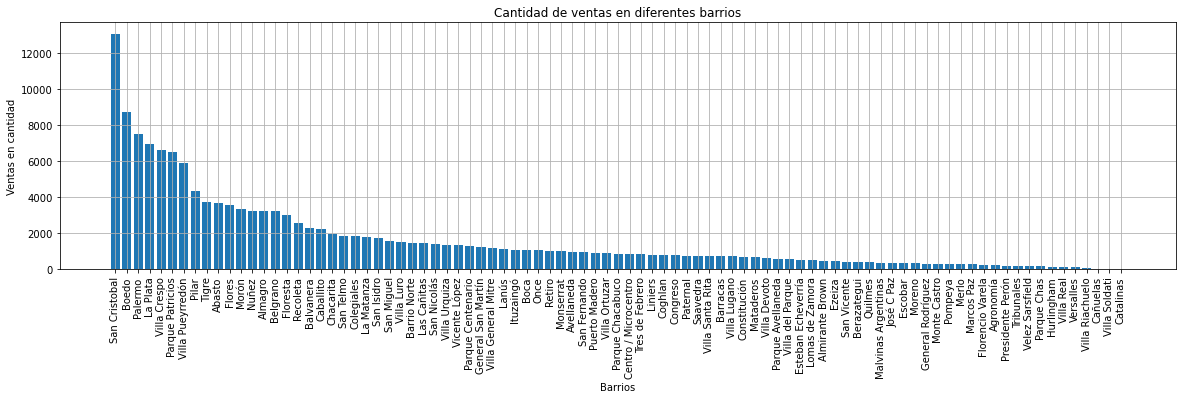

In [ ]:
#Ahora que tengo los datos necesarios guardados en varibles, grafico para hacer visual lo solicitado
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)

#grafico variable l2
plt.title('Cantidad de ventas en diferentes barrios')
plt.xlabel('Barrios')
plt.ylabel('Ventas en cantidad')
plt.bar(varible_l3,cantidad_l3)
plt.xticks(rotation=90)
plt.grid()

***ELIMINACION DE INSTANCIAS DUPLICADAS***

In [ ]:
#Chequeo y luego elimino instancias duplicados
dataset_sin_dup = propiedades.drop_duplicates()
print(f'Numero de instancias duplicadas', propiedades.shape[0]-dataset_sin_dup.shape[0])
print(f'Numero de instancias del dataset filtrado', dataset_sin_dup.shape[0])
print(dataset_sin_dup.shape)

Numero de instancias duplicadas 2358
Numero de instancias del dataset filtrado 144302
(144302, 19)


***SELECCION DE VARIABLES DE INTERES EN LA ZONA DE CAPITAL FEDERAL Y EN LOS 3 TIPOS DE PROPIEDAD MAYORITARIOS***

In [ ]:
#Ahora paso a seleccionar las columnas de interes, que aportan datos significativos a mi dataset. Selecciono Capital Federal ya que acumula la mayor cantidad de propiedades
#Ademas selecciono los tipos de propiedades Departamento, Casa, PH. Toda esta informacion fue descubierta en el Sprint 1 al llevar a cabo un analisis exploratorio.
#Selecciono las columnas 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type'. Esta ultima columna dejo solo tipos 'Departamento','Casa','PH' que son los mayoritarios
prop_selec_variables = dataset_sin_dup[(dataset_sin_dup.l2 == 'Capital Federal') & (dataset_sin_dup.property_type.isin(['Departamento','Casa','PH']))].drop(columns=['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1','l2', 'currency', 'title', 'description', 'operation_type'])
prop_selec_variables.head()

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [ ]:
#observo si la dimension coincide con el Checkpoint
prop_selec_variables.shape

(89874, 8)

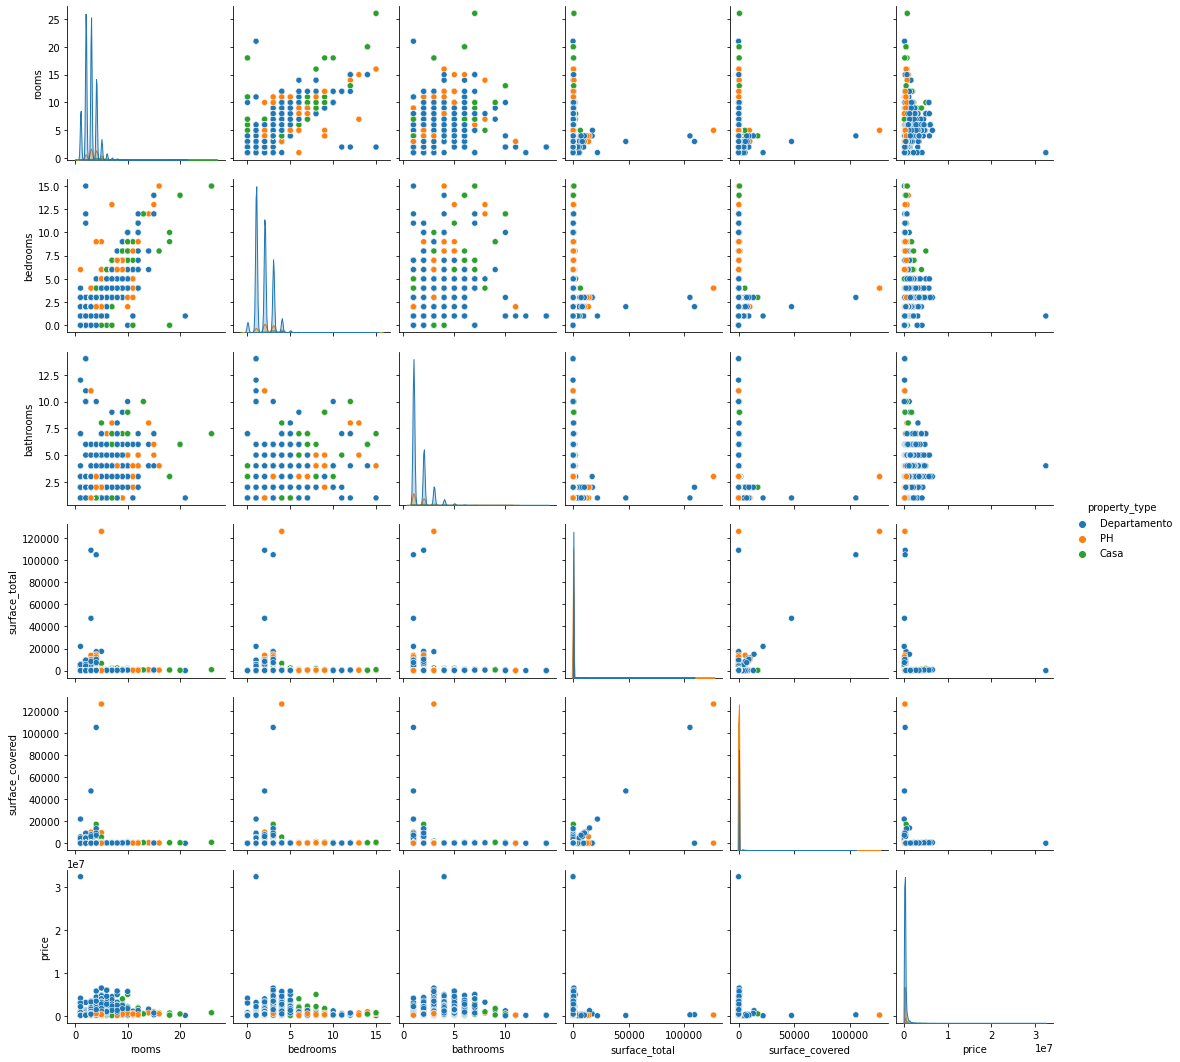

In [ ]:
sns.pairplot(prop_selec_variables, hue = 'property_type')

***DATOS FALTANTES IMPUTADOS POR LA MEDIANA***

In [ ]:
#Para observar los nombres de columnas y la cantidad de datos faltantes, genero con dichas columnas del dataframe y contabilizo los valores NaN (son valores faltantes)
lista = list(prop_selec_variables.columns)
print(lista)

#Observo con la funcion isna y sum la cantidad de NaN que exiten en cada columna del dataset
for i in lista:
    print (i, ': ', prop_selec_variables[i].isna().sum())

['l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'property_type']
l3 :  0
rooms :  0
bedrooms :  0
bathrooms :  2147
surface_total :  8717
surface_covered :  9024
price :  0
property_type :  0


In [ ]:
#imputar datos en variables con datos faltantes
#ver otro estadistico: mediana/moda, u otros.

#bathrooms
valores_mediana_bathrooms = prop_selec_variables.groupby('property_type')['bathrooms'].median()
valores_mediana_bathrooms2 = dict(round(valores_mediana_bathrooms))
print(valores_mediana_bathrooms2)

#surface_total
valores_mediana_surface_total  = prop_selec_variables.groupby('property_type')['surface_total'].median()
valores_mediana_surface_total2 = dict(round(valores_mediana_surface_total))
print(valores_mediana_surface_total2)

#surface_covered
valores_mediana_surface_covered = prop_selec_variables.groupby('property_type')['surface_covered'].median()
valores_mediana_surface_covered2 = dict(round(valores_mediana_surface_covered))
print(valores_mediana_surface_covered2)

{'Casa': 2.0, 'Departamento': 1.0, 'PH': 1.0}
{'Casa': 230.0, 'Departamento': 66.0, 'PH': 105.0}
{'Casa': 179.0, 'Departamento': 60.0, 'PH': 84.0}


In [ ]:
#aplico los valores imputados a cada variable correspondiente
prop_selec_variables.bathrooms = prop_selec_variables.bathrooms.fillna(prop_selec_variables.property_type.map(valores_mediana_bathrooms2))
prop_selec_variables.surface_total = prop_selec_variables.surface_total.fillna(prop_selec_variables.property_type.map(valores_mediana_surface_total2))
prop_selec_variables.surface_covered = prop_selec_variables.surface_covered.fillna(prop_selec_variables.property_type.map(valores_mediana_surface_covered2))

In [ ]:
#Chequeo de que los datos faltantes fueron imputados por la mediana
for i in lista:
    print (i, ': ', prop_selec_variables[i].isna().sum())

l3 :  0
rooms :  0
bedrooms :  0
bathrooms :  0
surface_total :  0
surface_covered :  0
price :  0
property_type :  0


***CHEQUEO Y CORRECION DE DATOS INVERTIDOS ENTRE SUP TOTAL Y SUP CUBIERTA***

In [ ]:
#elimino los datos de la superficie cubierta mayor a los de superficie total, ya que es no es posible
#data_filtrado_final = data_sin_out[data_sin_out.surface_covered <= data_sin_out.surface_total]

#puede haber pasado que los datos de superficie cubierta y total esten invertidos; puedo solucionar eso con los siguiente:
#sintaxis para invertir datos masl anotados entre surface_covered y surface_total
superficies_incorrectas = prop_selec_variables.loc[prop_selec_variables.surface_total < prop_selec_variables.surface_covered]
print('La cantidad de instancias incorrectas son:',len(superficies_incorrectas))

La cantidad de instancias incorrectas son: 1055


In [ ]:
#Invierto los valores de sup cubierta y total de la siguiente manera:
prop_selec_variables.loc[superficies_incorrectas.index,'surface_total'] = superficies_incorrectas.surface_covered
prop_selec_variables.loc[superficies_incorrectas.index,'surface_covered'] = superficies_incorrectas.surface_total

In [ ]:
### Para verificar que las invirtio bien realizo lo siguiente:
superficies_incorrectas = prop_selec_variables.loc[prop_selec_variables.surface_total < prop_selec_variables.surface_covered]
print(len(superficies_incorrectas))
prop_selec_variables.reset_index(drop=True,inplace=True)

0


In [ ]:
#observo nuevamente
prop_selec_variables[prop_selec_variables.surface_covered > prop_selec_variables.surface_total].sum()

l3                 0.0
rooms              0.0
bedrooms           0.0
bathrooms          0.0
surface_total      0.0
surface_covered    0.0
price              0.0
property_type      0.0
dtype: float64

[Text(0.5, 1.0, 'Precio por cada tipo de propiedad')]

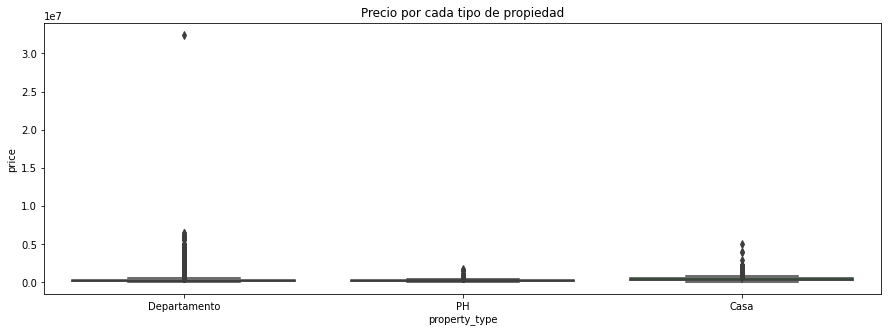

In [ ]:
#grafico para ver distribucion de los datos en cada variable y observar posibles outliers
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables, x = 'property_type',y = 'price').set(title='Precio por cada tipo de propiedad')

[Text(0.5, 1.0, 'Rooms por cada tipo de propiedad')]

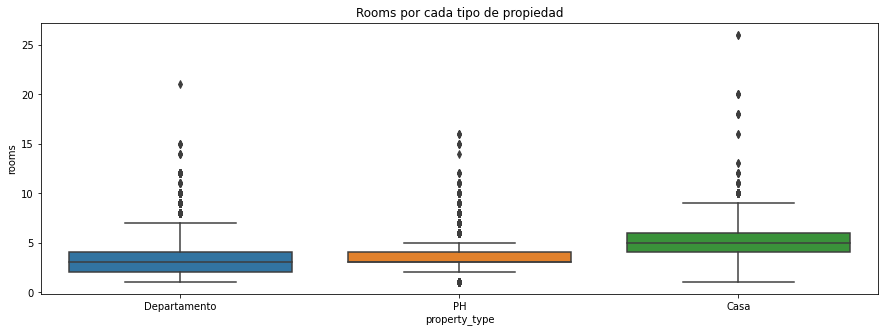

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables, x = 'property_type',y = 'rooms').set(title='Rooms por cada tipo de propiedad')

[Text(0.5, 1.0, 'Bedrooms por cada tipo de propiedad')]

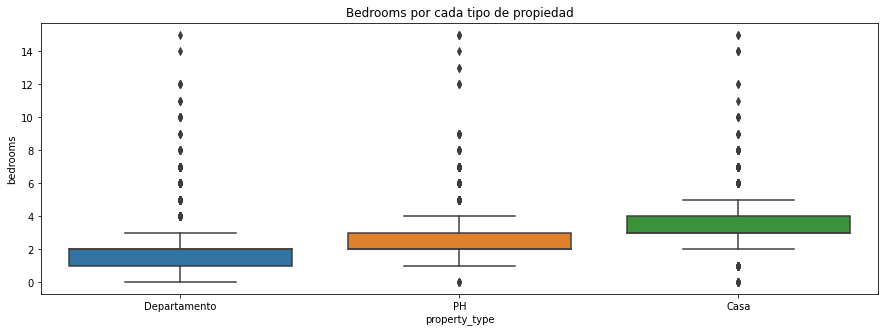

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables, x = 'property_type',y = 'bedrooms').set(title='Bedrooms por cada tipo de propiedad')

[Text(0.5, 1.0, 'Bathrooms por cada tipo de propiedad')]

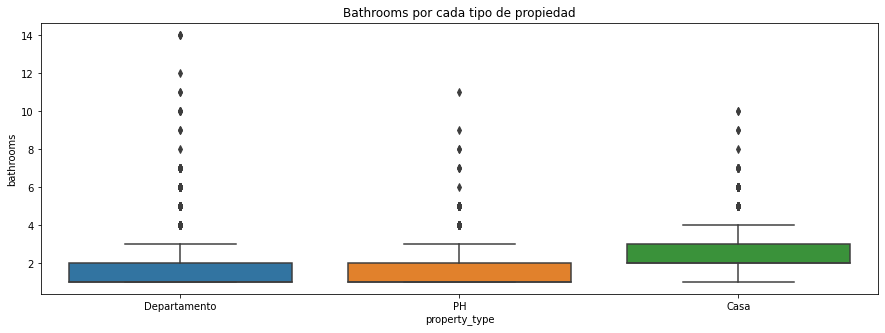

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables, x = 'property_type',y = 'bathrooms').set(title='Bathrooms por cada tipo de propiedad')

[Text(0.5, 1.0, 'Surface_total por cada tipo de propiedad')]

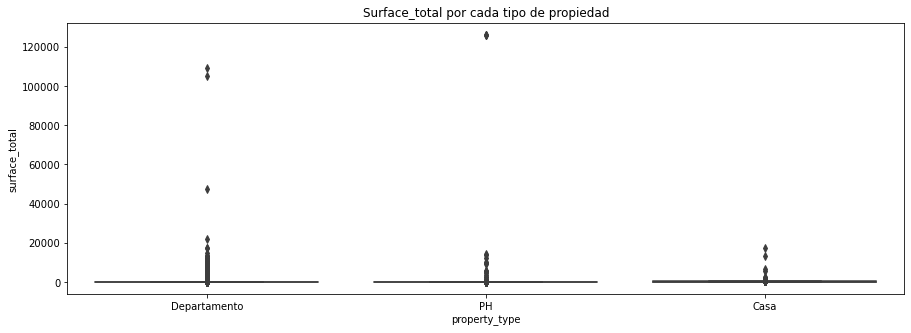

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables, x = 'property_type',y = 'surface_total').set(title='Surface_total por cada tipo de propiedad')

[Text(0.5, 1.0, 'Surface_covered por cada tipo de propiedad')]

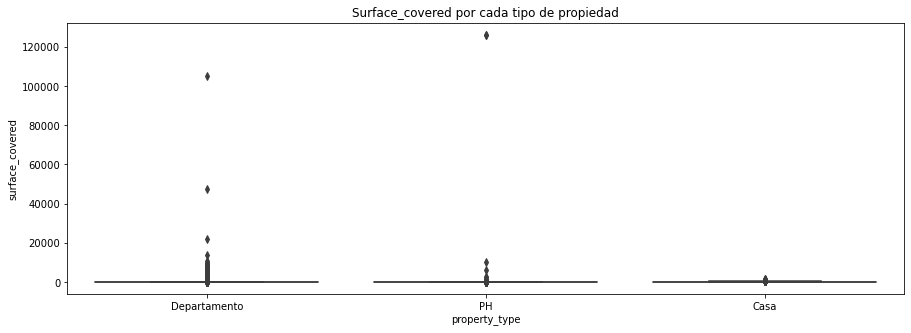

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables, x = 'property_type',y = 'surface_covered').set(title='Surface_covered por cada tipo de propiedad')

***DISTRIBUCION DE LAS VARIABLES SELECCIONADAS***

In [ ]:
#observo la distribucion de las variables previo a la eliminacion de aoutliers
prop_selec_variables.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,89874.0,2.965129,1.317503,1.0,2.0,3.0,4.0,26.0
bedrooms,89874.0,1.960456,1.074358,0.0,1.0,2.0,3.0,15.0
bathrooms,89874.0,1.546799,0.852264,1.0,1.0,1.0,2.0,14.0
surface_total,89874.0,111.692981,949.822905,12.0,51.0,66.0,105.0,126062.0
surface_covered,89874.0,89.656953,732.271601,1.0,46.0,60.0,91.0,126062.0
price,89874.0,258719.496695,319076.158932,6000.0,120000.0,175000.0,278200.0,32434232.0


In [ ]:
#vuelvo a chequear la dimension del dataset ya que al chequear la presencia de outliers voy a aplicar un filtrado para eliminarlos
prop_selec_variables.shape

(89874, 8)

***MANEJO Y ELIMINACION DE LOS OUTLIERS CON LA SIGUIENTE METODOLOGIA***

In [ ]:
#variables: 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'
def eliminarOutliers(datos, variable):
    q25 = datos[variable].quantile(0.25)
    q75 = datos[variable].quantile(0.75)
    iqr = q75 - q25
    minimo = q25 - 1.5 * iqr
    maximo = q75 + 1.5 * iqr
    outliers = np.logical_or(datos[variable] < minimo, datos[variable] > maximo)
    datos_sin_outliers = datos[~outliers]
    outliers = datos[outliers]
    return variable, minimo, maximo

In [ ]:
# Selecciono las variables de interes y obtengo los limites para eliminar los outliers
variables = 'rooms','bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'

for i in variables:
        print(eliminarOutliers(prop_selec_variables, i))

('rooms', -1.0, 7.0)
('bedrooms', -2.0, 6.0)
('bathrooms', -0.5, 3.5)
('surface_total', -30.0, 186.0)
('surface_covered', -21.5, 158.5)
('price', -117300.0, 515500.0)


In [ ]:
prop_selec_variables.shape

(89874, 8)

In [ ]:
#De acuerdo a los valores establecidos en los pasos anteriores filtro los outliers
#Corto solo por los valores mayores, ya que el limite obtenido por los valores menores dio negativo

prop_selec_variables_SO = prop_selec_variables[(prop_selec_variables.rooms <= 7)
                                               & (prop_selec_variables.bedrooms <= 6)
                                               & (prop_selec_variables.bathrooms <= 4) #redondeo de baños en 4
                                               & (prop_selec_variables.surface_total <= 186)
                                               & (prop_selec_variables.surface_covered <= 159) #redondeo a 159
                                               & (prop_selec_variables.price <= 515500)]

In [ ]:
#observo la dimension del dataset luego del filtrado de outliers
prop_selec_variables_SO.shape

(77800, 8)

***CALCULO DE LA REDUCCION DEL DATASET LUEGO DE ELIMINAR OUTLIERS***

In [ ]:
#porcentaje de reduccion post filtrado
data_conOutliers = prop_selec_variables.shape[0]
data_sinOutliers = prop_selec_variables_SO.shape[0]
Porcentaje_reduccion = (100-(data_sinOutliers/data_conOutliers)*100)
print('El porcentaje de reduccion es de', Porcentaje_reduccion, '%')

El porcentaje de reduccion es de 13.434363664686117 %


In [ ]:
# Visualizo nuevamente el nuevo dataset
prop_selec_variables_SO

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
5,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...
89863,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento
89864,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH
89865,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
89870,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


***DISTRIBUCION DE LAS VARIABLES POST ELIMINACION DE OUTLIERS***

In [ ]:
# Ejecuto un describe para ver la distribucion de cada variable luego de la eliminacion de outliers
prop_selec_variables_SO.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,77800.0,2.688573,1.015930,1.0,2.0,3.0,3.0,7.0
bedrooms,77800.0,1.746812,0.870787,0.0,1.0,2.0,2.0,6.0
bathrooms,77800.0,1.358355,0.606069,1.0,1.0,1.0,2.0,4.0
surface_total,77800.0,71.716542,31.590546,12.0,49.0,66.0,86.0,186.0
surface_covered,77800.0,63.361979,26.606661,1.0,44.0,60.0,75.0,159.0
price,77800.0,184031.383548,92580.609059,7500.0,115000.0,160000.0,230000.0,515407.0


[Text(0.5, 1.0, 'Precio por cada tipo de propiedad')]

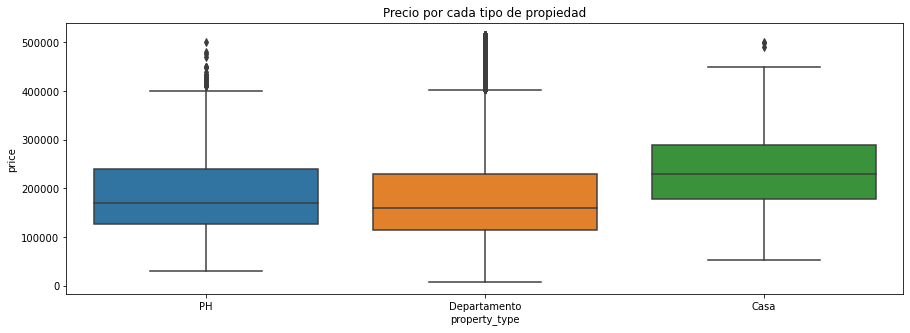

In [ ]:
#Ahora grafico para observar como es la distribucion luego de los filtrados desarrollados
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables_SO, x = 'property_type',y = 'price').set(title= 'Precio por cada tipo de propiedad')

[Text(0.5, 1.0, 'Sup Total por cada tipo de propiedad')]

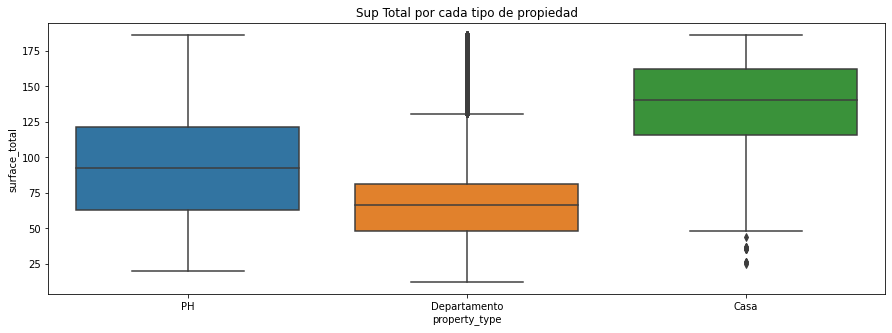

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables_SO, x = 'property_type',y = 'surface_total').set(title= 'Sup Total por cada tipo de propiedad')

[Text(0.5, 1.0, 'Sup cubierta por cada tipo de propiedad')]

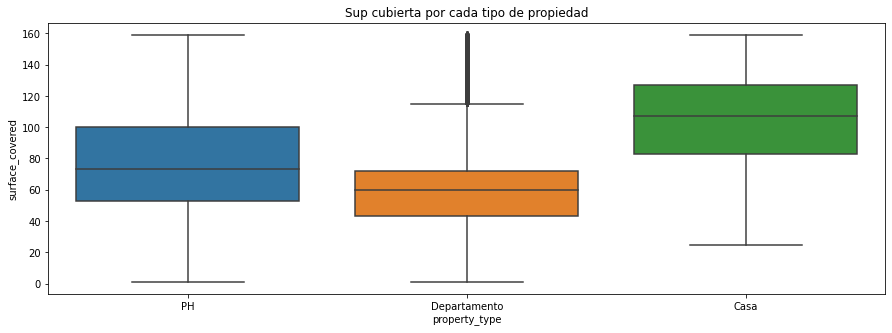

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data = prop_selec_variables_SO, x = 'property_type',y = 'surface_covered').set(title= 'Sup cubierta por cada tipo de propiedad')

Aqui puedo ver que los diferentes pasos de filtrados mejora mucho la distribucion de cada variable en estudio, por lo que el grafico de boxplot lo muestra de manera crucial entre los graficos hechos previo a los filtrados y estos graficos post-filtrado.

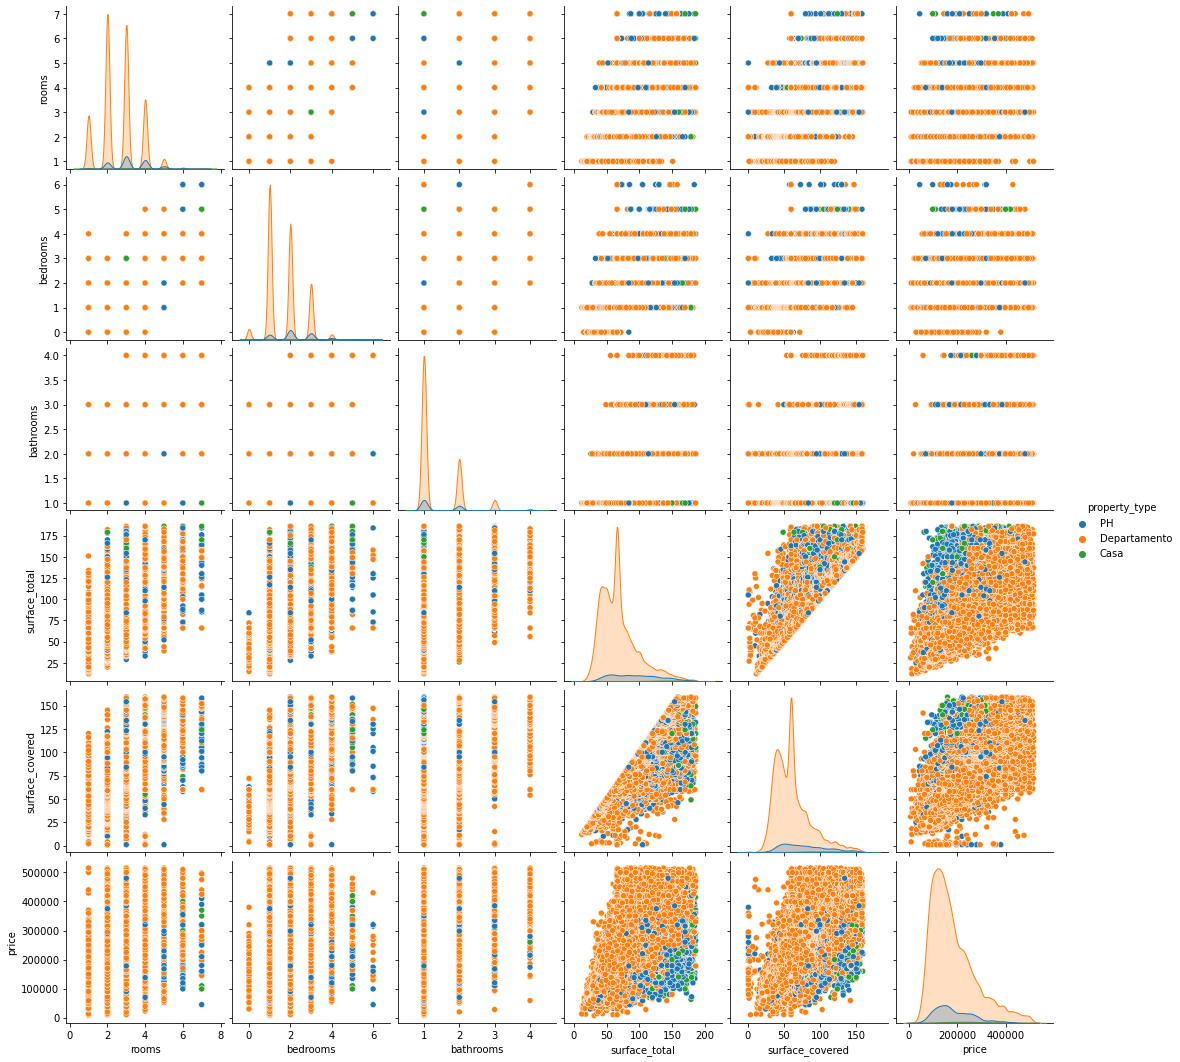

In [ ]:
# Realizo un pairplot para ver la distribucion de todas las variables del nuevo dataset filtrado
sns.pairplot(prop_selec_variables_SO, hue = 'property_type')
plt.show()

In [ ]:
#Observo nuevamente el dataset previo a los modelos
prop_selec_variables_SO

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
5,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...
89863,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento
89864,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH
89865,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
89870,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


## ENCODING

Luego de todo los filtros comienzo con a encodear las variables 'l3' y 'property_type'


In [ ]:
#realizo dummies con get_dummies para cada tipo de propiedad
df_encoded = pd.get_dummies(prop_selec_variables_SO, columns=['l3','property_type']) #donde tiene el 1 indica el tipo de propiedad que es
df_encoded

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89863,3.0,2.0,2.0,82.0,82.0,475000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
89864,3.0,2.0,1.0,84.0,84.0,178000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89865,5.0,2.0,2.0,114.0,95.0,298000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89870,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Defino ahora las variables X e y - Uso para X todas las variables menos el precio que si la selecciono en 'y' ya que es lo que quiero predecir
X = df_encoded.drop(['price'], axis=1)
y = df_encoded.price

X

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
1,2.0,1.0,2.0,70.0,58.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.0,1.0,1.0,56.0,56.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2.0,1.0,1.0,70.0,70.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89863,3.0,2.0,2.0,82.0,82.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
89864,3.0,2.0,1.0,84.0,84.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89865,5.0,2.0,2.0,114.0,95.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89870,3.0,2.0,2.0,144.0,134.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Luego de encodear las variables de interes
#Entreno los modelos a la vez, teniendo en cuenta un 30% del dataset para entrenar (train_test_split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54460, 65) (54460,) (23340, 65) (23340,)


## ESCALADO DE LOS DATOS

Realizo un escalado de datos ya que en el dataset existen variables con valores bajos y otros altos en su comparacion; entonces con el escalado mantengo la variabilidad o desvio de los datos pero con una referencia central para todas las variables de interes

In [ ]:
# Escalado de los datos con StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scl = StandardScaler()
X_train_scl = scl.fit_transform(X_train) #escalado de datos train con fit_transform
X_test_scl = scl.transform(X_test) #escalado de datos test solo con transform

print(X_train_scl.shape)
print(X_test_scl.shape)

# data.Datos.values.reshape(-1,1))
# data.Datos_Reescalados = pd.DataFrame(X_esc)

(54460, 65)
(23340, 65)


In [ ]:
#Entreno un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros optimizados en el SPRINT 1.
#Defino los modelos y los entreno
clf_linear_model = LinearRegression()
clf_tree_regressor = DecisionTreeRegressor(max_depth=9, random_state=42)
clf_knn_regressor = KNeighborsRegressor(n_neighbors=15)

In [ ]:
#Generar un modelo benchmark

clf_linear_model.fit(X_train_scl, y_train)
clf_tree_regressor.fit(X_train_scl, y_train)
clf_knn_regressor.fit(X_train_scl, y_train)

KNeighborsRegressor(n_neighbors=15)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 47595.00184424773
Raíz del error cuadrático medio en Test: 47490.05356920949 



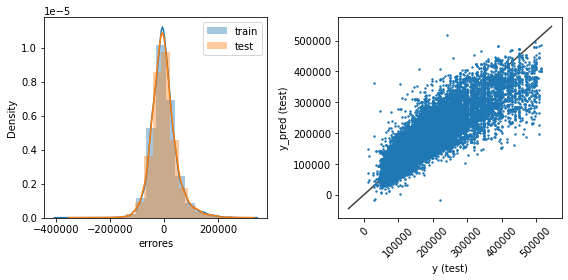

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 46409.311794619956
Raíz del error cuadrático medio en Test: 47555.88547716789 



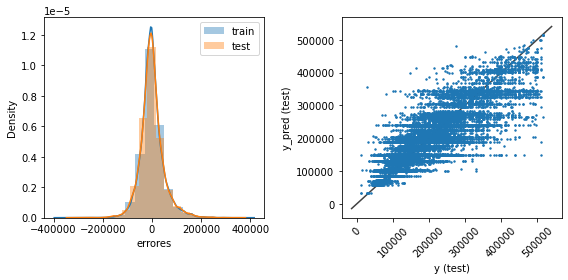

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 36977.90837990134
Raíz del error cuadrático medio en Test: 39022.044590649166 



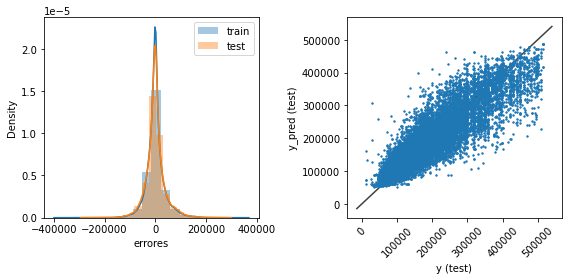

In [ ]:
# grafico la distribucion de errores y el grafico entre la comparacion de y_test e y_test_pred

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([clf_linear_model, clf_tree_regressor, clf_knn_regressor]):
    y_train_pred = model.predict(X_train_scl)
    y_test_pred = model.predict(X_test_scl)

    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}', '\n')

    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test, y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Comparacion con el modelos del SPRINT 1 luego de optimizar sus parametros:

***Modelo: Regresión lineal***

- Raíz del error cuadrático medio en Train: 203015.35633339902

- Raíz del error cuadrático medio en Test: 205955.81413686287

***Modelo: Árbol de Decisión*** (mejor modelo del SPRINT Nº1)

- Raíz del error cuadrático medio en Train: 164462.09232032398

- Raíz del error cuadrático medio en Test: 177954.20409256668

***Modelo: Vecinos más cercanos***

- Raíz del error cuadrático medio en Train: 169287.11925475684

- Raíz del error cuadrático medio en Test: 184477.0973693032


Al comparar con los modelos del SPRINT 1 observo que:

- El filtrado del dataset en conjunto con el encodeado de las variables seleccionadas y el escalado de las mismas mejoran en gran medida la prediccion del precio.

- En el primer SPRINT el mejor modelo fue para el de arbol de decision con un RSME de 177954 (Dolares) en la prediccion del test, y en este caso pasa a ser el mejor modelo el de Vecinos mas cercanos con un RSME de 39022 (Dolares) en la prediccion del test. La mejora es notable para la prediccion filtrando el dataset y haciendo un encodeo y un escalado de las variables de interes.


Hasta este punto el mejor modelo para predecir el precio es el de:

***Modelo: Vecinos más cercanos***
- Raíz del error cuadrático medio en Train: 36977.90837990134
- Raíz del error cuadrático medio en Test: 39022.044590649166




***AHORA PRUEBO NUEVAMENTE EL MODELO PERO HACIENDO UNA REDUCCIÓN DE LA DIMENSIONALIDAD CON PCA***

In [ ]:
# Vuelvo a escalar solo la X que es donde estan las variables de interes
X_esc_prop = StandardScaler().fit_transform(X)
X_esc_prop

array([[-0.67778055, -0.85763424,  1.05870736, ..., -0.09128887,
        -2.88147215,  3.01292552],
       [-0.67778055, -0.85763424, -0.59128128, ..., -0.09128887,
        -2.88147215,  3.01292552],
       [-0.67778055, -0.85763424, -0.59128128, ..., -0.09128887,
        -2.88147215,  3.01292552],
       ...,
       [ 2.27519737,  0.290759  ,  1.05870736, ..., -0.09128887,
        -2.88147215,  3.01292552],
       [ 0.30654542,  0.290759  ,  1.05870736, ..., -0.09128887,
        -2.88147215,  3.01292552],
       [ 0.30654542,  0.290759  ,  1.05870736, ..., -0.09128887,
         0.34704483, -0.33190333]])

In [ ]:
# Utilizo PCA para preparar los atributos

# pca_prop = PCA(n_components=2) #selecciono 2 componentes de dimensionalidad como inicio
pca_prop = PCA(n_components=6) #seleciono 6 luego de ver cual es el numero de componentes que me predice mejor
pca_prop.fit(X_esc_prop)

pca_prop

PCA(n_components=6)

In [ ]:
pca_prop.mean_

array([ 1.11056551e-16, -6.13733571e-17,  1.51972122e-16,  2.04577857e-17,
        1.25669255e-16,  5.29710523e-18,  1.11421869e-17,  6.72184388e-17,
        3.72623954e-17,  5.04138291e-17, -1.82658801e-17,  2.04577857e-17,
       -2.05491151e-18,  0.00000000e+00, -3.05040198e-17, -1.64392921e-18,
       -1.46127041e-17,  4.63953354e-17, -3.72623954e-17,  2.48415969e-17,
       -1.66219509e-17,  5.47976403e-19,  1.24207985e-17,  4.53907120e-17,
       -4.45687474e-17, -3.65317602e-17,  2.20560502e-17,  8.40230484e-18,
        3.63034367e-17, -1.97271505e-17,  2.11884209e-17, -9.93663877e-17,
       -1.38820689e-17, -7.30635204e-18, -4.76739471e-17,  1.82658801e-18,
       -1.36994101e-17, -1.75352449e-17, -3.47051722e-18, -3.06866786e-17,
       -1.46127041e-17, -3.65317602e-17, -2.02751269e-17,  1.71699273e-17,
        1.93618329e-17, -3.58011250e-17, -4.20115242e-18,  1.68959391e-17,
       -2.15994032e-17, -3.50704898e-17,  5.18750995e-17,  1.42473865e-17,
        1.33340925e-17,  

In [ ]:
pca_prop.components_ #me dice los valores de los vectores de la nueva dimension; las direcciones de las flechas de cada componente

array([[ 4.44068321e-01,  4.38341867e-01,  3.27927363e-01,
         4.46263395e-01,  4.50933168e-01,  5.02345787e-03,
         6.88458739e-03,  1.10742292e-02, -1.63266925e-02,
         1.11498832e-02,  1.80625325e-02,  1.75433801e-02,
        -1.05648946e-02, -8.51430706e-03,  1.39454724e-02,
         1.45028741e-03, -1.40382179e-02, -3.33119476e-03,
        -4.42931227e-03, -1.36774190e-02, -9.68994903e-03,
        -1.85212766e-02,  1.53826604e-02,  5.08279060e-03,
         9.49225780e-03, -4.19830655e-03,  1.84703467e-02,
        -8.59032530e-03, -5.26495469e-03, -5.99686663e-03,
        -4.34554292e-03, -1.92019385e-02,  1.47201138e-02,
         3.22401283e-02,  1.17492571e-03,  2.44348992e-03,
         6.09423928e-03,  9.35416126e-03,  1.94142241e-02,
        -1.33499301e-02,  2.93631369e-02,  4.14752992e-03,
        -4.55666605e-03, -2.83936959e-02, -2.53327213e-02,
        -2.23701847e-02, -6.95450512e-04, -8.00110566e-04,
         7.23070298e-03, -2.49121009e-02,  2.39614357e-0

Observo la varianza explicada por cada componente y luego de manera global

In [ ]:
print(pca_prop.explained_variance_ratio_) #porcentaje que explica la transformacion

[0.06182018 0.03066332 0.01704288 0.01643685 0.01626871 0.01609046]


In [ ]:
print(pca_prop.explained_variance_ratio_.sum())  #porcentaje global

0.15832238215873085


In [ ]:
# Defino la X para el PCA y luego ingresar al modelo
X_pca = pca_prop.transform(X_esc_prop)
X_pca

array([[ 6.35517515e-01,  4.15016756e+00, -4.76877324e-01,
        -6.48201054e-01,  3.48354546e-01,  3.44842556e-01],
       [-4.51051809e-01,  3.90237007e+00, -2.34292489e+00,
        -1.04530617e-01,  3.65554715e-02, -2.44266895e-01],
       [ 1.98750205e-01,  3.81517468e+00, -2.36148466e+00,
        -1.24237912e-02,  4.76286086e-02, -2.33002174e-01],
       ...,
       [ 3.72688299e+00,  2.72537452e+00, -2.38519737e+00,
        -1.77733872e-01, -1.22507363e-02, -1.09247211e-01],
       [ 3.93744063e+00,  2.72389409e+00, -2.45108354e+00,
         1.06128646e-01, -8.16599265e-04, -1.46082064e-01],
       [ 2.82940554e+00, -1.32500795e+00, -2.13258280e+00,
         5.07409576e-01,  2.98012248e-02,  1.36783307e-01]])

In [ ]:
print(X_pca.shape)
print(y.shape)

if X_pca.shape[0] != y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(77800, 6)
(77800,)


In [ ]:
# Dev es igual que train y Held es el test

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42)

print(X_train_pca.shape, y_train_pca.shape, X_test_pca.shape, y_test_pca.shape)

(54460, 6) (54460,) (23340, 6) (23340,)


In [ ]:
#Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

pca_linear_model = LinearRegression()
pca_tree_regressor = DecisionTreeRegressor(max_depth=9, random_state=42)
pca_knn_regressor = KNeighborsRegressor(n_neighbors=15)

In [ ]:
#Generar un modelo benchmark y evaluarlo.

pca_linear_model.fit(X_train_pca, y_train_pca)
pca_tree_regressor.fit(X_train_pca, y_train_pca)
pca_knn_regressor.fit(X_train_pca, y_train_pca)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
#La regresión lineal obtiene las pendientes y la ordenada al origen. Observamos eso de la siguiente manera
print(pca_linear_model.coef_, pca_linear_model.intercept_)

[ 31737.09133168 -22287.66468322 -16729.73379656  11414.74966501
  -2765.8329492    2149.29837056] 184158.4018118559


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 55860.812613364025
Raíz del error cuadrático medio en Test: 55388.19733156999 



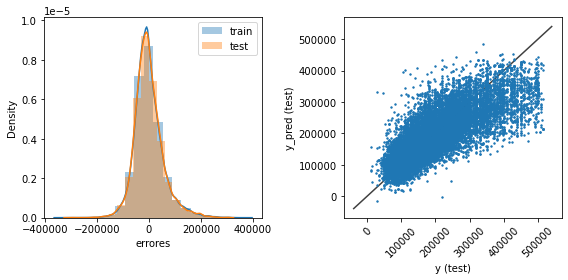

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 42737.52132228144
Raíz del error cuadrático medio en Test: 44572.17341356553 



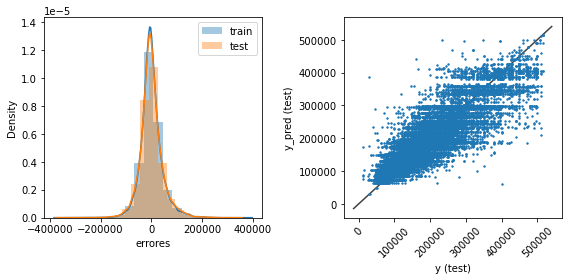

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 37826.34513821221
Raíz del error cuadrático medio en Test: 39816.7774853663 



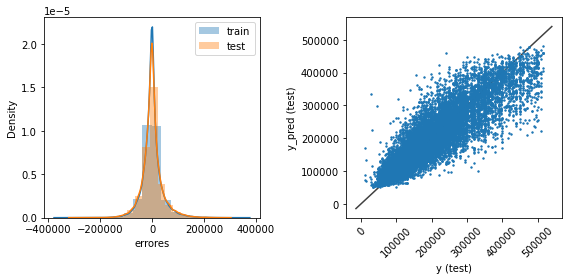

In [ ]:
# grafico la distribucion de errores y el grafico entre la comparacion de y_test e y_test_pred para el PCA

modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([pca_linear_model, pca_tree_regressor, pca_knn_regressor]):
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train_pca, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test_pca, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}', '\n')
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train_pca - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test_pca - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_pca, y_test_pred, s =2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

***OPTIMIZACION DEL NUMEROS DE COMPONENTE PARA PCA***

In [ ]:
# Calculo del error de Vecinos más cercanos para el PCA - estimo un rango de componente de 1 a 20 y observo los errores obtenidos

errorKNN_train = []
errorKNN_test = []
diferencia_entre_errores = []

for i in range(1, 20):
    pca_prop = PCA(n_components=i)
    pca_prop.fit(X_esc_prop)
    X_pca = pca_prop.transform(X_esc_prop)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42)
    pca_knn_regressor = KNeighborsRegressor(n_neighbors=15)
    pca_knn_regressor.fit(X_train_pca, y_train_pca)
    y_train_pred = pca_knn_regressor.predict(X_train_pca)
    y_test_pred = pca_knn_regressor.predict(X_test_pca)
    rmse_test = np.sqrt(mean_squared_error(y_test_pca, y_test_pred))
    rmse_train = np.sqrt(mean_squared_error(y_train_pca, y_train_pred))
    errorKNN_train.append(rmse_train)
    errorKNN_test.append(rmse_test)
    diferencia_entre_errores = np.array(errorKNN_test)-np.array(errorKNN_train)

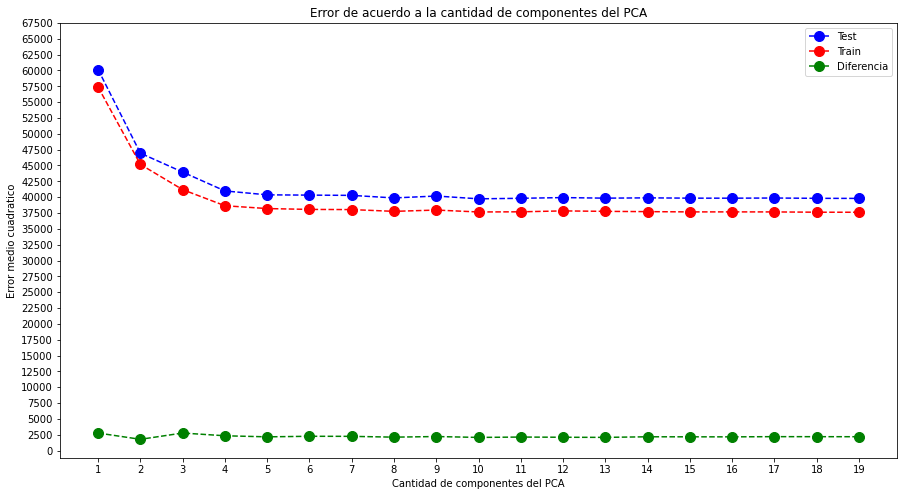

In [ ]:
#grafico del error con diferentes numeros de vecinos en KNN para PCA

plt.figure(figsize=(15, 8))
plt.plot(range(1, 20), errorKNN_test,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Test')
plt.plot(range(1, 20), errorKNN_train, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label='Train')
plt.plot(range(1, 20), diferencia_entre_errores, color='green', linestyle='dashed',
         marker='o', markerfacecolor='green', markersize=10, label='Diferencia')
plt.title('Error de acuerdo a la cantidad de componentes del PCA')
plt.xlabel('Cantidad de componentes del PCA')
plt.ylabel('Error medio cuadratico')
plt.xticks(np.arange (1, 20, step = 1))
plt.yticks(np.arange (0, 70000, step = 2500))
plt.legend()
plt.show()

A partir del estudio de los errores me quedo con un PCA de 6 componente (volvi a correrlo directamente arriba para no generar mas codigo).


***KNN:***

Modelo: Vecinos más cercanos
- Raíz del error cuadrático medio en Train: 36977.90837990134
- Raíz del error cuadrático medio en Test: 39022.044590649166

***KNN con PCA:***

Modelo: Vecinos más cercanos
- Raíz del error cuadrático medio en Train: 37826.34513821221
- Raíz del error cuadrático medio en Test: 39816.7774853663

A pesar de haber mejorado mucho, el modelo de KNN anterior al PCA funciona mejor, por lo que lo selecciono para seguir avanzando con el proyecto.


AHORA COMIENZO CON UN MODELO AVANZADO Y LUEGO OPTIMIZO SUS HIPERPARAMETROS PARA MEJORAR LO MAXIMO LA PREDICCION

## MODELOS AVANZADOS

In [ ]:
# Antes de empezar defino esta funcion para poder observar como funcionan los modelos
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))

    plt.subplot(1,2,1) #Con el 1,2 definimos la cantidad de gráficos, en este caso 2, y con el 1 del final, definimos la posicion de grafico
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

***1er Modelo: Regresión lineal y regularización Ridge***

In [ ]:
#Pruebo con un modelo de polinomio en base 2
poly = PolynomialFeatures()
X_train_new = poly.fit_transform(X_train_scl)
X_test_new = poly.transform(X_test_scl)
print(X_train_new.shape, X_test_new.shape)

(54460, 2211) (23340, 2211)


In [ ]:
#Realizo la regularizacion de Ridge para la regresion lineal
reg_ridge = Ridge()
reg_ridge.fit(X_train_new, y_train)
print('Pendiente:', reg_ridge.coef_, '\n' , 'Ordenada:',reg_ridge.intercept_)


Pendiente: [   0.         5050.46129246 7073.32936224 ... -707.00362819  732.3655832
 -767.65203973] 
 Ordenada: 205620.17403614498


Raíz del error cuadrático medio en Train: 43518.448419437154
Raíz del error cuadrático medio en Test: 43587.90319523603


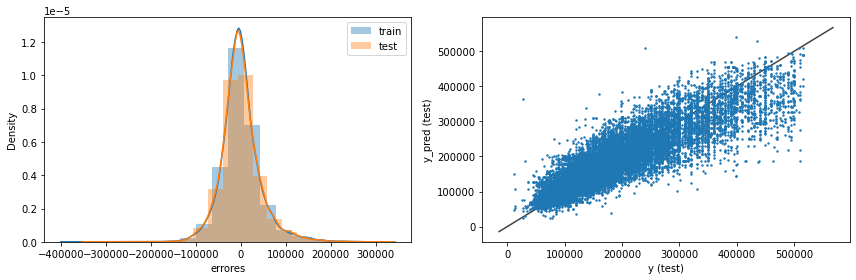

In [ ]:
# Evaluacion Modelo lineal con ajuste de ridge
evaluar_regresion(reg_ridge, X, y, X_train_new, X_test_new, y_train, y_test)

***2do Modelo: RANDOM FOREST***

In [ ]:
#Genero el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scl, y_train)

RandomForestRegressor(random_state=42)

Raíz del error cuadrático medio en Train: 21479.24410343222
Raíz del error cuadrático medio en Test: 33754.93172862223


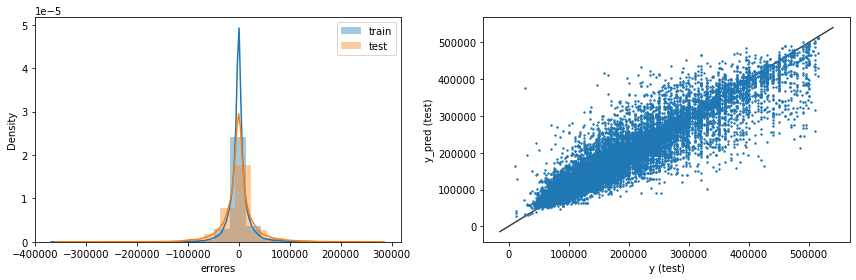

In [ ]:
evaluar_regresion(rf_regressor, X, y, X_train_scl, X_test_scl, y_train, y_test)

***Optimización de hiperparámetros***

- Optimizacion en Random Forest

In [ ]:
# Random Search - RANDOM FOREST
# En la optimización de hiperparámetros
param_grid_rf = {'n_estimators': [10, 50, 100, 300],      #Cantidad de arboles
                 'max_depth': [2, 4, 8, 15, 20, 30],  #Profundidad maxima del arbol
                 "min_samples_leaf": [1,3,5],     #Número mínimo para dividir un nodo interno
                 "min_samples_split": [1,3,5]}    #Número mínimo de una hoja de un nodo
param_grid_rf

{'n_estimators': [10, 50, 100, 300],
 'max_depth': [2, 4, 8, 15, 20, 30],
 'min_samples_leaf': [1, 3, 5],
 'min_samples_split': [1, 3, 5]}

Los parametros y rangos seleccionados, de acuerdo a la bibliografia leida, son aquellos de importancia para el modelo y aquellos que mejoran el desempeño del mismo, evitando el overfitting entre el train y el test. Por ejemplo el caso del 'max_depth' que es acerca de la profundidad del modelo, al aumentar el numero el modelo mejora en su prediccion pero se hace mas evidente el overfitting, por lo que establecí un rango adecuado para mejorar el desempeño sin caer en el overfitting del mismo.

In [ ]:
# ESTRATEGIA 1: Random Search para RF
model_RF = RandomizedSearchCV(rf_regressor, param_grid_rf, n_iter=10, cv=5) #5 folders

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5
model_RF.fit(X_train_scl, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [2, 4, 8, 15, 20, 30],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [1, 3, 5],
                                        'n_estimators': [10, 50, 100, 300]})

In [ ]:
print("Mejores parametros: "+str(model_RF.best_params_))
print("Mejor Score: "+str(model_RF.best_score_)+'\n')

scores_rf = pd.DataFrame(model_RF.cv_results_)
scores_rf

Mejores parametros: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Mejor Score: 0.8385327891862092



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,42.845703,1.461831,0.289832,0.025261,300,3,5,8,"{'n_estimators': 300, 'min_samples_split': 3, ...",0.745941,0.739015,0.730894,0.729848,0.740733,0.737286,0.006098,4
1,0.138134,0.009116,0.000000,0.000000,300,1,1,15,"{'n_estimators': 300, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,10.444822,0.683542,0.086958,0.012073,50,3,3,15,"{'n_estimators': 50, 'min_samples_split': 3, '...",0.820828,0.816148,0.805690,0.811949,0.814394,0.813802,0.004989,3
3,24.332491,1.689858,0.240858,0.026573,100,5,1,20,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.845969,0.837958,0.830813,0.839607,0.838315,0.838533,0.004825,1
4,11.681119,1.401300,0.085951,0.001423,50,3,1,15,"{'n_estimators': 50, 'min_samples_split': 3, '...",0.825379,0.818612,0.809577,0.817527,0.818916,0.818002,0.005037,2
5,5.760302,0.204419,0.036192,0.009731,50,3,5,4,"{'n_estimators': 50, 'min_samples_split': 3, '...",0.633986,0.630641,0.619426,0.627376,0.635568,0.629399,0.005730,5
6,0.133320,0.002727,0.000000,0.000000,300,1,3,15,"{'n_estimators': 300, 'min_samples_split': 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,17.079420,0.427328,0.118941,0.013954,300,3,1,2,"{'n_estimators': 300, 'min_samples_split': 3, ...",0.511261,0.509484,0.501911,0.519222,0.515993,0.511574,0.005931,7
8,3.233150,0.410626,0.021802,0.000396,50,5,5,2,"{'n_estimators': 50, 'min_samples_split': 5, '...",0.510488,0.510288,0.500913,0.521395,0.516119,0.511841,0.006830,6
9,0.029185,0.001156,0.000000,0.000000,10,1,1,15,"{'n_estimators': 10, 'min_samples_split': 1, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [ ]:
# corro nuevamente el Random Forest con los hiperparametros optimizados
rf_regressor_opt = RandomForestRegressor(random_state=42, n_estimators= 10, min_samples_split= 3, min_samples_leaf= 3, max_depth= 20)
rf_regressor_opt.fit(X_train_scl, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, min_samples_split=3,
                      n_estimators=10, random_state=42)

Raíz del error cuadrático medio en Train: 32285.19336253903
Raíz del error cuadrático medio en Test: 37485.185929666724


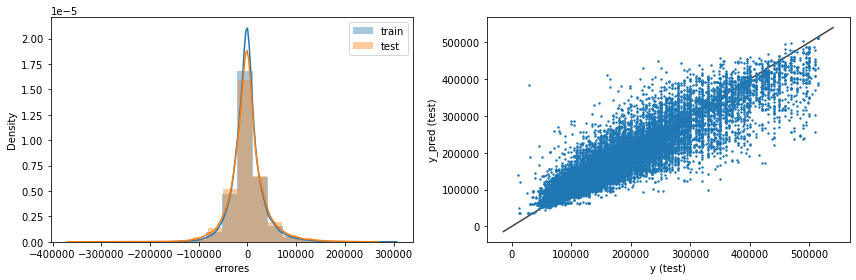

In [ ]:
evaluar_regresion(rf_regressor_opt, X, y, X_train_scl, X_test_scl, y_train, y_test)

***Random Forest sin optimizacion***
- Raíz del error cuadrático medio en Train: 21479.24410343222
- Raíz del error cuadrático medio en Test: 33754.93172862223


Puede observarse que existe overfitting en el modelo

***Random Forest con optimizacion***
- Raíz del error cuadrático medio en Train: 32285.19336253903
- Raíz del error cuadrático medio en Test: 37485.185929666724


A pesar de la optimizacion, el error en la prediccion no mejoro, aunque si puede observarse un menor overfitting en comparacion al anterior
    

***Errores obtenidos en la prediccion de los modelos ejecutados previamente:***

***KNN:***

Modelo: Vecinos más cercanos
- Raíz del error cuadrático medio en Train: 36977.90837990134
- Raíz del error cuadrático medio en Test: 39022.044590649166

***KNN con PCA:***

Modelo: Vecinos más cercanos
- Raíz del error cuadrático medio en Train: 37826.34513821221
- Raíz del error cuadrático medio en Test: 39816.7774853663

***Ahora optimizo los hiperparámetros para la Regresión Ridge mediante Grid Search***
- Optimizacion de la regresion

In [ ]:
# GridSearch - REGRESSION LINEAER with Ridge
param_grid_ridge = {"alpha": [0.001, 0.005, 0.1, 0.5, 0.75, 1],
                   "fit_intercept": [True, False]}
param_grid_ridge

{'alpha': [0.001, 0.005, 0.1, 0.5, 0.75, 1], 'fit_intercept': [True, False]}

***Para este caso selecciono los parametros 'alpha' y 'fit_intercept', que son lo que fuerzan mayormente la regularizacion. Esto mejora el condicionamiento del problema y reduce la varianza de las estimaciones propias del modelo***

In [ ]:
# ESTRATEGIA 2: Grid Search
model_ridge = GridSearchCV(reg_ridge, param_grid=param_grid_ridge, cv=5) #5 folders

# Entrenamos: tree con la grilla definida arriba y CV con tamaño de Fold=5
model_ridge.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.1, 0.5, 0.75, 1],
                         'fit_intercept': [True, False]})

In [ ]:
print("Mejores parametros: "+str(model_ridge.best_params_))
print("Mejor Score: "+str(model_ridge.best_score_)+'\n')

scores_ridge = pd.DataFrame(model_ridge.cv_results_)
scores_ridge

Mejores parametros: {'alpha': 1, 'fit_intercept': True}
Mejor Score: 0.7748826963002874



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.391117,0.184286,0.045575,0.006526,0.001,True,"{'alpha': 0.001, 'fit_intercept': True}",0.781441,0.777708,0.765900,0.773525,0.775833,0.774881,0.005185,6
1,5.205023,0.161568,0.056371,0.012684,0.001,False,"{'alpha': 0.001, 'fit_intercept': False}",0.781450,0.777708,0.765869,0.773526,0.775833,0.774877,0.005198,12
2,5.512429,0.395901,0.050574,0.009085,0.005,True,"{'alpha': 0.005, 'fit_intercept': True}",0.781441,0.777708,0.765900,0.773525,0.775833,0.774881,0.005185,5
3,5.193631,0.224299,0.050373,0.011766,0.005,False,"{'alpha': 0.005, 'fit_intercept': False}",0.781450,0.777708,0.765869,0.773526,0.775833,0.774877,0.005198,11
4,6.334777,0.572779,0.054171,0.008227,0.1,True,"{'alpha': 0.1, 'fit_intercept': True}",0.781441,0.777708,0.765900,0.773525,0.775833,0.774881,0.005185,4
5,5.799082,0.147687,0.058170,0.019164,0.1,False,"{'alpha': 0.1, 'fit_intercept': False}",0.781450,0.777708,0.765869,0.773526,0.775833,0.774877,0.005198,10
6,6.100911,0.593778,0.055570,0.012233,0.5,True,"{'alpha': 0.5, 'fit_intercept': True}",0.781441,0.777709,0.765901,0.773527,0.775833,0.774882,0.005185,3
7,6.036747,0.799420,0.052374,0.006940,0.5,False,"{'alpha': 0.5, 'fit_intercept': False}",0.781450,0.777709,0.765870,0.773528,0.775833,0.774878,0.005198,9
8,6.053138,0.349859,0.053973,0.007096,0.75,True,"{'alpha': 0.75, 'fit_intercept': True}",0.781441,0.777709,0.765901,0.773528,0.775833,0.774882,0.005185,2
9,5.813076,0.952077,0.055370,0.005639,0.75,False,"{'alpha': 0.75, 'fit_intercept': False}",0.781450,0.777709,0.765870,0.773529,0.775833,0.774878,0.005198,8


In [ ]:
# corro nuevamente el Regressor con Ridge pero con los hiperparametros optimizados
reg_ridge_opt = Ridge(alpha=1, fit_intercept=True)
reg_ridge_opt.fit(X_train_new, y_train)
print('Pendiente:', reg_ridge_opt.coef_, '\n' , 'Ordenada:',reg_ridge_opt.intercept_)

Pendiente: [   0.         5050.46129246 7073.32936224 ... -707.00362819  732.3655832
 -767.65203973] 
 Ordenada: 205620.17403614498


Raíz del error cuadrático medio en Train: 43518.448419437154
Raíz del error cuadrático medio en Test: 43587.90319523603


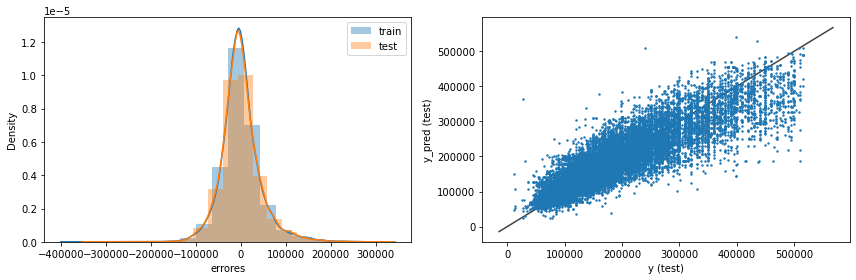

In [ ]:
# Evaluacion Modelo lineal con ajuste de ridge optimizado
evaluar_regresion(reg_ridge_opt, X, y, X_train_new, X_test_new, y_train, y_test)

***Regresion Ridge sin optimizar los hiperparametros:***
- Raíz del error cuadrático medio en Train: 43518.448419437154
- Raíz del error cuadrático medio en Test: 43587.90319523603

***Regresion Ridge con optimizar los hiperparametros:***
- Raíz del error cuadrático medio en Train: 43518.448419437154
- Raíz del error cuadrático medio en Test: 43587.90319523603

A pesar de la optimizacion de los parametros el modelo sigue igual en su performance en general.

## INTERPRETACION DE LOS MODELOS OPTIMIZADOS

- Estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
- Los errores del modelo. ¿Dónde es mayor el error? ¿dónde acierta?

***Errores obtenidos en la prediccion de los modelos ejecutados en este Sprint y el Sprint1:***

El mejor modelo del Sprint1 fue el de Árbol de Decisión con los siguientes errores RMSE

***Modelo: Árbol de Decisión***

- Raíz del error cuadrático medio en Train: 164462.09232032398

- Raíz del error cuadrático medio en Test: 177954.20409256668


El mejor modelo en el comienzo de este Sprint. Como puede observarse el error en la prediccion se redujo drasticamente en comparacion con el Sprint 1 con los pasos de filtrado, encodeado y escalado de los datos

***Modelo: Vecinos más cercanos***
- Raíz del error cuadrático medio en Train: 36977.90837990134
- Raíz del error cuadrático medio en Test: 39022.044590649166


Al realizar un PCA con esos mismos datos, la prediccion no mejora:

***KNN original:***

Modelo: Vecinos más cercanos
- Raíz del error cuadrático medio en Train: 36977.90837990134
- Raíz del error cuadrático medio en Test: 39022.044590649166

***KNN con PCA:***

Modelo: Vecinos más cercanos
- Raíz del error cuadrático medio en Train: 37826.34513821221
- Raíz del error cuadrático medio en Test: 39816.7774853663

Luego, con los modelos avanzados y la optimizacion de sus hiperparametros puedo observar los siguientes errores:

***Regresion Ridge sin optimizar los hiperparametros:***
- Raíz del error cuadrático medio en Train: 43518.448419437154
- Raíz del error cuadrático medio en Test: 43587.90319523603

***Regresion Ridge con optimizar los hiperparametros:***
- Raíz del error cuadrático medio en Train: 43518.448419437154
- Raíz del error cuadrático medio en Test: 43587.90319523603


***Random Forest sin optimizacion***
- Raíz del error cuadrático medio en Train: 21479.24410343222
- Raíz del error cuadrático medio en Test: 33754.93172862223

***Random Forest con optimizacion***
- Raíz del error cuadrático medio en Train: 32285.19336253903
- Raíz del error cuadrático medio en Test: 37485.185929666724


Luego de todos estos pasos, puedo observar que el modelo que mas acierta es el de Random Forest con optimizacion, y el que mayor error presenta es el de Regresión lineal con regularización Ridge.

Las variables seleccionadas y filtradas con los diferentes ejemplos desarrollados funciona bien, pero no termina de definir una prediccion certera como input en los modelos desarrollados.

### CORRECCION
### Interpretación de Modelos
### H) Errores
### Rehacer. Dar la interpretación y detalle de los errores de un modelo en particular, en cuanto a su distribución. ¿Dónde es mayor el error? ¿dónde acierta?

- En particular podemos observar que el modelo ***Random Forest regressor sin optimizacion de sus hiperparametros*** es el que muestra el mejor desempeño para predicir el precio de las propiedades, obteniendo un valor del error cuadratico medio en el Train de 21479 Dolares en la prediccion del precio y de 33754 Dolares en el test.

- Este modelo fue el que obtuvo el mejor acierto en su prediccion, mostrando los valores mas bajos en los errors cuadráticos medios, a pesar de que existe un nivel de overfitting entre ellos. La distribucion de los errores, como se visualiza en celdas anteriores (Nº71) es acorde a lo esperando, con un grafico de barras que se solapan y forman un pico tanto para el Train como para el Test, por lo que el modelo se equivoca en los errores de manera similar para ambos conjuntos. En el grafico de dispersion, los menores errores de la prediccion del precio se desarrolla para el rango de los menores valores de las propiedades; a partir del precio aproximado de 300.000 Dolares se observa que la dispersion de los puntos en el grafico es mayor, por la que el error en la prediccion (**y_test** vs **y_pred_test**) se torna mayor al acercarse a los valores del extremo mayor de precios.

- Al interpretar este modelo en particular, puedo deducir que el modelo utilizado es mucho más preciso a la hora de predecir el precio de propiedades dentro del rango de los menores valores en comparacion con las del rango de los mayores valores. Es por eso que puede observarse una menor dispersión de los datos en el grafico de **y_test** en comparacion del **y_test predicho** al inicio del eje **x** y del eje **y**.

- Esto puede deberse a que existen mas datos relevados para propiedades de menor valor en comparacion con aquellas propiedades de valores mayores precios. Asi, el modelo obtiene su entrenamiento con muchos datos de entrada de propiedades de bajo a mediano precio y con pocos datos de entrada para los valores mas altos, y como consecuencia el modelo no predice de manera significativa en el rango de los mayores precios, y alli se observa el mayor error en la prediccion.


***Ahora busco que variables fueron las mas importantes, en este caso para el modelo de Random Forest que es el modelo que mejor predijo el precio de las propiedades***

In [ ]:
modelo_Random_Forest = model_RF.best_estimator_
modelo_Random_Forest

RF_importances_features = modelo_Random_Forest.feature_importances_
RF_importances_features

array([2.20943819e-02, 1.31547315e-02, 1.15959943e-01, 5.19664619e-01,
       1.32291581e-01, 1.75567721e-04, 6.74442199e-05, 2.84384706e-03,
       2.81272202e-03, 6.40952302e-04, 9.92069348e-03, 2.21198761e-02,
       3.71804839e-04, 3.45131482e-04, 4.12624749e-03, 2.30617882e-06,
       1.13730013e-04, 5.89359558e-04, 1.27680915e-03, 3.32337826e-03,
       4.11292589e-04, 8.71755876e-04, 1.12804260e-03, 8.54824901e-04,
       6.60080341e-03, 4.27962321e-04, 7.49478683e-04, 5.65150912e-04,
       1.30354967e-04, 8.77753406e-03, 9.81977404e-04, 3.42429688e-02,
       2.85200831e-04, 4.07005394e-04, 5.35920282e-04, 1.63395944e-04,
       1.42338862e-04, 4.53956211e-04, 5.34694623e-04, 2.75211465e-02,
       1.93010241e-02, 2.14076707e-03, 7.71032571e-04, 1.76607859e-03,
       3.97583798e-04, 3.94243366e-04, 1.63544423e-04, 4.00096571e-05,
       5.52679192e-05, 1.56970502e-03, 1.07954560e-03, 1.85474017e-04,
       2.93561805e-03, 6.80133970e-04, 4.09859969e-04, 1.84105411e-04,
      

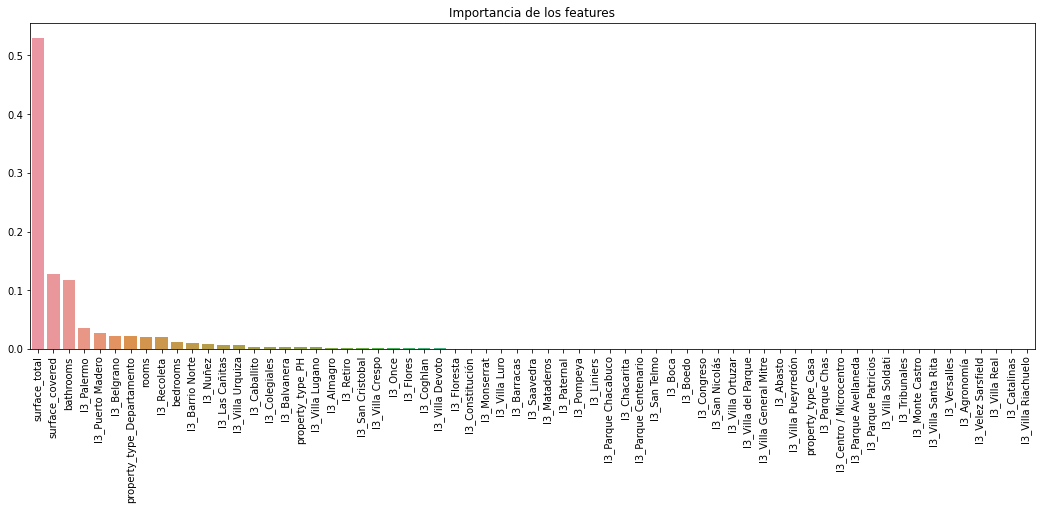

In [ ]:
importances = rf_regressor_opt.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(18,6))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.title('Importancia de los features')
plt.show()

Puedo observar en el grafico la importancia o peso de cada variable, de mayor a menor, en la prediccion del precio de la propiedad. Superficie total, cubierta y baños fueron las que mas aportaron en la prediccion del modelo. Esto ayuda a la hora de tener en cuenta que variable seleccionar a la hora de generar un modelo benchmark

## ADICIONAL

Analisis de las varibles en estudio - PCA y clustering para estudio de tipo de propiedad y barrios en donde se encuentran

In [ ]:
prop_selec_variables_SO

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
5,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...
89863,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento
89864,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH
89865,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH
89870,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH


***PCA PARA REDUCCION DE LA DIMENSIONALIDAD***

In [ ]:
df = prop_selec_variables_SO
features = [ 'surface_total','price', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms']# Separating out the features
x = prop_selec_variables_SO.loc[:, features].values   # Separating out the target
y = prop_selec_variables_SO.loc[:,['property_type']].values  # Standardizing the features
x_scl = StandardScaler().fit_transform(x)

In [ ]:
pca_prop = PCA(n_components=2)
pca_prop.fit(x_scl)

principalComponents = pca_prop.transform(x_scl)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])
principalDf

,PCA1,PCA2
0,-0.496995,-1.255438
1,-1.762076,-0.054053
2,-0.424682,-0.869508
3,-1.326219,-0.181605
4,-0.865096,-0.241714
...,...,...
77795,2.284171,-1.722563
77796,0.529925,0.655163
77797,3.023537,-0.033886
77798,4.005309,-1.815909


In [ ]:
pca_prop.mean_

array([ 2.04577857e-17,  2.33803265e-17,  1.25669255e-16,  1.11056551e-16,
       -6.13733571e-17,  1.51972122e-16])

In [ ]:
pca_prop.components_ #me dice los valores de los vectores de la nueva dimension; las direcciones de las flechas de cada componente

array([[ 0.4277777 ,  0.38828449,  0.44033755,  0.42325203,  0.41756942,
         0.34472849],
       [-0.02782799, -0.42406939, -0.0080984 ,  0.46227658,  0.47299192,
        -0.61798396]])

In [ ]:
print(pca_prop.explained_variance_ratio_) #porcentaje que explica la transformacion

[0.73027727 0.11250362]


In [ ]:
print(pca_prop.explained_variance_ratio_.sum())  #porcentaje global

0.8427808821944636


Grafico la varianza explicada por cada componente

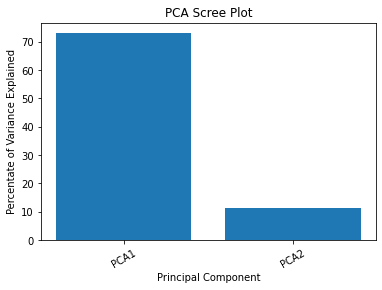

In [ ]:
percent_variance = np.round(pca_prop.explained_variance_ratio_* 100, decimals =2)
columns = ['PCA1', 'PCA2']
plt.bar(x= columns, height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks(rotation=30)
plt.show()

En la gráfica se aprecia claramente que la mayor parte de la varianza (en torno al 75%) corresponde a la primera componente, mientras que la segunda acumula y explica alrededor del 11% de la varianza. Los valores exactos de cada componente pueden visualizarse dos celdas arriba.

In [ ]:
#Agrego las etiquetas al nuevo dataset
finalDf = pd.concat([principalDf, df[['property_type']]], axis = 1)
finalDf

,PCA1,PCA2,property_type
0,-0.496995,-1.255438,NaN
1,-1.762076,-0.054053,PH
2,-0.424682,-0.869508,PH
3,-1.326219,-0.181605,PH
4,-0.865096,-0.241714,PH
...,...,...,...
89863,NaN,NaN,Departamento
89864,NaN,NaN,PH
89865,NaN,NaN,PH
89870,NaN,NaN,PH


In [ ]:
print(finalDf.isna().sum())

PCA1             10105
PCA2             10105
property_type    10105
dtype: int64


In [ ]:
finalDf.dropna(inplace=True)
print(finalDf.isna().sum())
print(finalDf.shape)

PCA1             0
PCA2             0
property_type    0
dtype: int64
(67695, 3)


In [ ]:
finalDf

,PCA1,PCA2,property_type
1,-1.762076,-0.054053,PH
2,-0.424682,-0.869508,PH
3,-1.326219,-0.181605,PH
4,-0.865096,-0.241714,PH
5,-2.462079,-0.341748,PH
...,...,...,...
77795,2.284171,-1.722563,Departamento
77796,0.529925,0.655163,Departamento
77797,3.023537,-0.033886,Departamento
77798,4.005309,-1.815909,Departamento


Ahora, representamos gráficamente el nuevo espacio de datos

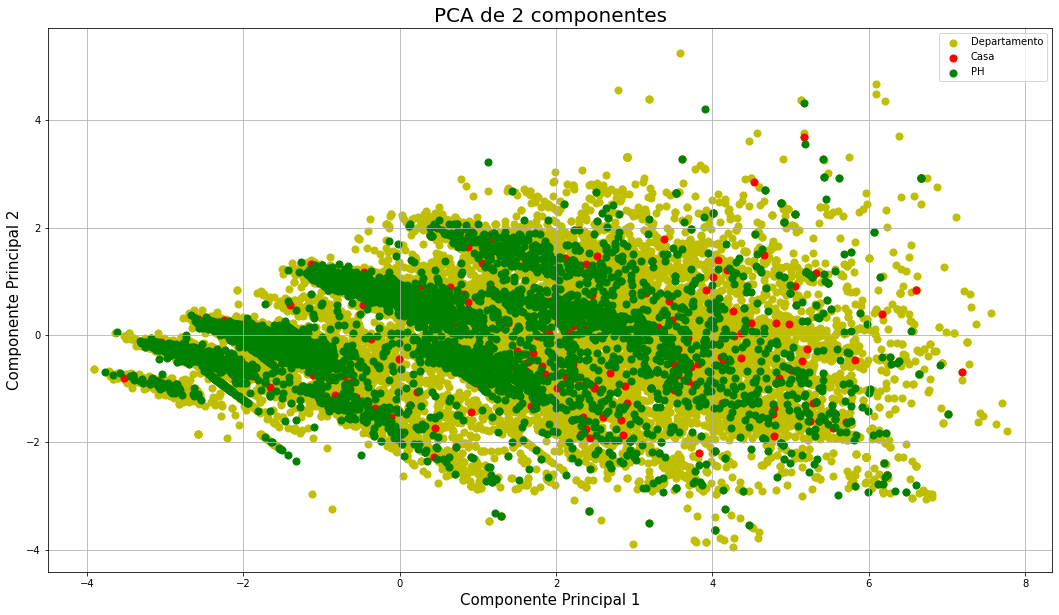

In [ ]:
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('PCA de 2 componentes', fontsize = 20)

targets = ['Departamento', 'Casa', 'PH']
colors = ['y', 'r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['property_type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA1']
               , finalDf.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Asi puedo reducir el conjunto de datos a un nuevo conjunto de datos de dos dimensiones que aún así conserva la información más esencial del dataset inicial
A pesar de poder explicar de manera mas sencilla los datos, su agrupamiento no es marcada con limites bien impuestos, sino que existe superposicion de los mismos. Podemos visualizar que tanto Departamento como PH comparte gran parte de la nube de datos, por lo que su similitud es bastante pareja, y Casa se distribuye entre toda esa nube de datos. Esto es esperable ya que los 3 tipos de propiedad comparten en gran medida los atributos seleccionados y eso no permite que agrupen de manera diferencial.

***CLUSTERING CON KMEANS***

***KMeans con variables 'surface_total' y 'price'***

In [ ]:
#CLUSTERING - Kmeans
df = prop_selec_variables_SO
X = prop_selec_variables_SO[['price', 'surface_total']] # Separating out the target
y = prop_selec_variables_SO[['property_type']] # Standardizing the features
X

,price,surface_total
1,159000.0,70.0
2,125000.0,45.0
3,295000.0,85.0
4,150000.0,56.0
5,159500.0,70.0
...,...,...
89863,475000.0,82.0
89864,178000.0,84.0
89865,298000.0,114.0
89870,480000.0,144.0


In [ ]:
# encodeo la variable y (mi target) que coloca un numero a cada tipo de propiedad
le = LabelEncoder()
y_le_ty = le.fit_transform(y)
y_le_ty

df['label_typeProp'] = y_le_ty = le.fit_transform(y)
df

#Casa como 0, Departamento como 1 y PH como 2

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,label_typeProp
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2
4,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2
5,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2
...,...,...,...,...,...,...,...,...,...
89863,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,Departamento,1
89864,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,PH,2
89865,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,PH,2
89870,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH,2


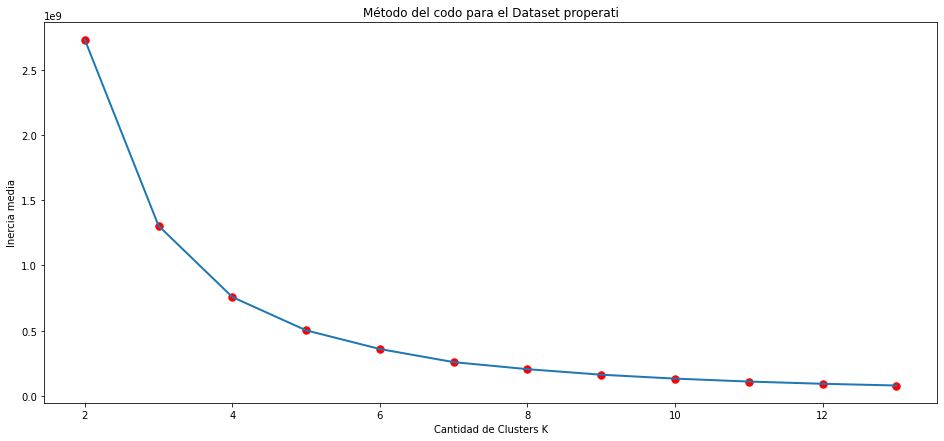

In [ ]:
# REALIZO UNA PRUEBA DE CODO PARA OBTENER EL MEJOR NUMERO DE CLUSTER Y UTILIZARLO EN EL K-MEANS

K = np.arange(2,14)

# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []

# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)

    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)

plt.figure(figsize = (16,7))
plt.plot(K, Sum_of_squared_distances, lw=2)
plt.scatter(K, Sum_of_squared_distances,s=55, c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset properati')

plt.show()

In [ ]:
# Ejecuto K-MEANS con 3 COMO MEJOR NUMERO DE CLUSTER
kmeans_prop = KMeans(n_clusters=3, random_state=42)
kmeans_prop = kmeans_prop.fit(X)

In [ ]:
etiquetas_prop = kmeans_prop.labels_ # miramos las etiquetas que les puso
print(etiquetas_prop)
print(etiquetas_prop.shape)

[1 1 2 ... 2 0 0]
(77800,)


In [ ]:
centros_prop = kmeans_prop.cluster_centers_ # centroides
print(centros_prop)

[[3.80536496e+05 1.13981674e+02]
 [1.19406555e+05 5.48402006e+01]
 [2.26737472e+05 8.59555503e+01]]


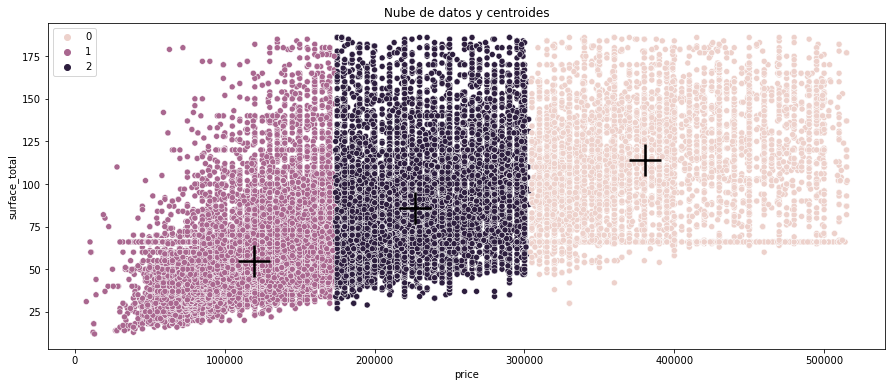

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(X['price'], X['surface_total'], hue = etiquetas_prop)
sns.scatterplot(centros_prop[:, 0], centros_prop[:, 1],color='black', marker="+", s=1000)
plt.title('Nube de datos y centroides')
plt.show()

<AxesSubplot:>

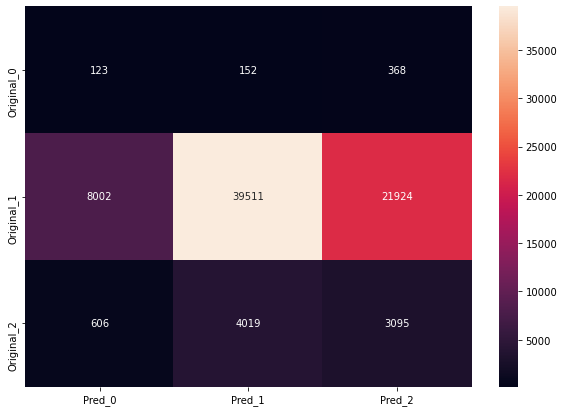

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_le_ty, etiquetas_prop)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2']], #Casa como 0, Departamento como 1 y PH como 2
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

Al visualizar esto podemos ver que Departamento y PH son mas parecidos entre si respecto del tipo Casa

Al visualizar esto, observo que el clustering no funciono de la manera esperada, pero si me brinda algo de informacion sobre cuales son los tipos de propiedad que mas se parecen y clusterizan juntos

<AxesSubplot:xlabel='surface_total', ylabel='price'>

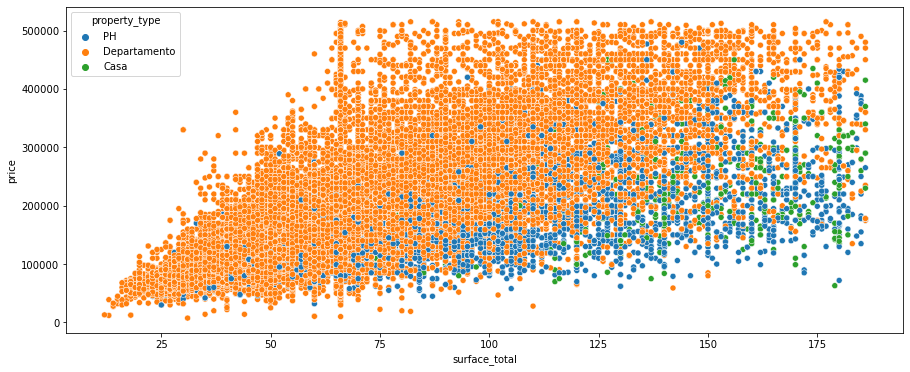

In [ ]:
# Visualizo los datos con las etiquetas reales
plt.figure(figsize=(15,6))
sns.scatterplot(x='surface_total', y='price', hue='property_type', data= prop_selec_variables_SO)

# CIERRE

- Ser crítico/a con la metodología utilizada. ¿Qué mejorarías? Ten en cuenta siempre terminar con una discusión sobre lo realizado y conclusiones obtenidas.

Para mejorar el analisis y posibles resultados, realizaria como proximos analisis separar el dataset por los 3 tipos de propiedad, en principal departamento y luego hacer un EDA y un benchmark con departamento, precio y superficie total. Creo que eso podria sergmentar mejor los resultados o posibles predicciones. Los datos a pesar de todos los pasos de filtrado muestran un patron uniforme en su distribuicion, y eso dificil separalos para poder predecir. Otra forma podria ser separar los datos al inicio por barrio y realizar una prediccion dentro de cada barrio para llegar al precio mas real, aunque esto no se si es lo correcto ya que pareceria que uno estaria generando un overfitting a mano al tratar de aprenderse los datos de entrada de memoria.

Otra prueba podria ser segmentar el dataset por un rango de precio respecto a cada propiedad, y luego ver como funcionan las predicciones dentro de cada segmento. Son ideas o posibles enfoques que podrian hacerse para llegar a obtener la mejor prediccion.

La metodologia utiliza creo que es eficaz para la prediccion del precio de manera general. Respecto a los grandes valores de precio que tiene el dataset, obtener un error de ~30000 dolares me parece moderado a bueno. El problema de este error obviamente va a ser a la hora de la prediccion de propiedades de menor valor, en la que el error podria ser grande (quiza del 50% del valor real de la propiedad) y eso haria que la prediccion falle. Quiza podria buscarse y apuntar a tratar de medir el error con algun coeficiente que mida el error respecto al valor real de la etiqueta; creo que eso haria mucho mas razonable el estudio de los errores.

Aqui con el RMSE pudo observarse los valores de los errores y con los graficos visto como se distribuian esos errores respecto del Train y del Test.

Por otra parte, como fue mencionado en el Sprint anterior, podria agregarse datos extras al dataset, como nuevas variables que estimen una explicacion mas real de porque una propiedad es cotizada en el mercado a un precio estimado. Eso podria ser por ejemplo por proximidad a las redes de subtes, proximidad a lineas de colectivos, escuelas, comisarias, que le darian un  valor mayoy y aqui en este dataset se pierde. Tambien podrian agragarse datos mas propios de cada propiedad como si poseen o no terraza, baulera, deposito, amenities, luminosidad, orientacion Norte-Sur/Este-Oeste u otra informacion que defina el valor real del inmueble.

Para finalizar la reduccion de la dimensionalidad es una herramienta eficaz para reducir la informacion total a solo unas pocas variables, aunque a mi entender refleja la informacion de entrada y como pudo observarse en el grafico de PCA no ayudo de manera potente a separar los inmuebles por tipo de propiedad, y obviamente esto era un poco de esperar ya que las variables seleccionadas comparten mucha de la informacion entre estos tipos, lo que hace que no se diferencien del todo.

Sin mas, saluda atentamente.
Paolo Cacchiarelli